In [1]:
#Necessary Libraries
import face_recognition 
from PIL import Image,ImageDraw,ImageFont

In [2]:
#Load first known image
first_image=face_recognition.load_image_file(".\\images\\barack.jpg")
first_face_encoding=face_recognition.face_encodings(first_image)[0]

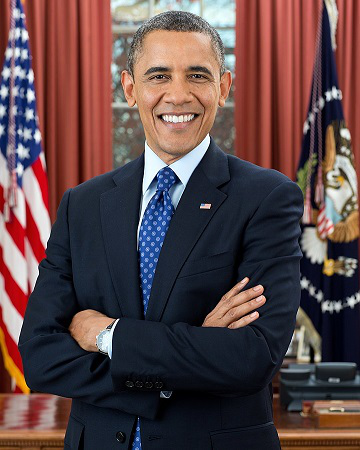

In [3]:
#Convert to PIL format & display first image
display(Image.fromarray(first_image))

In [4]:
#Load second known image
second_image=face_recognition.load_image_file(".\\images\\michelle.jpg")
second_face_encoding=face_recognition.face_encodings(second_image)[0]


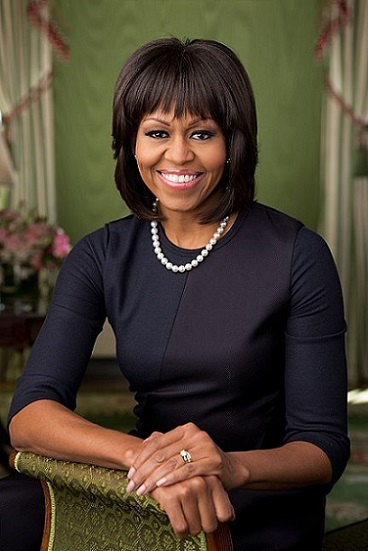

In [5]:
#Convert to PIL format & display second mage
display(Image.fromarray(second_image))

In [20]:
#Creat Array of encodings and names
known_face_encodings=[
    first_face_encoding,
    second_face_encoding
]
known_face_names=[
    "Barack",
    "Michelle"
]

In [102]:
#Load test image
test_image=face_recognition.load_image_file(".\\images\\test.JPG")

#Find face locations in test image
face_locations=face_recognition.face_locations(test_image)
face_encodings=face_recognition.face_encodings(test_image)

#Convert to PIL format
pil_image=Image.fromarray(test_image)


In [103]:
#Creat an imageDraw instance
draw=ImageDraw.Draw(pil_image)

In [104]:
font = ImageFont.truetype("arial.ttf", 30)

#Loop through faces in test image
for(top, right, bottom, left),face_encoding in zip(face_locations, face_encodings):
    matches=face_recognition.compare_faces(known_face_encodings, face_encoding)

    name="Unknown"

    #If match
    if True in matches:
        first_match_index=matches.index(True)
        name=known_face_names[first_match_index]
    #Draw Box
    draw.rectangle(((left,top),(right,bottom)),outline=(0,0,0))
    #Darw Label
    text_width,text_height=draw.textsize(name)
    draw.rectangle(((left,bottom-text_height+5),(right,bottom)),fill=(0,0,0),outline=(0,0,0))
    draw.text((left+6,bottom-text_height+5),name,fill=(255,255,255,255))


In [105]:
del draw

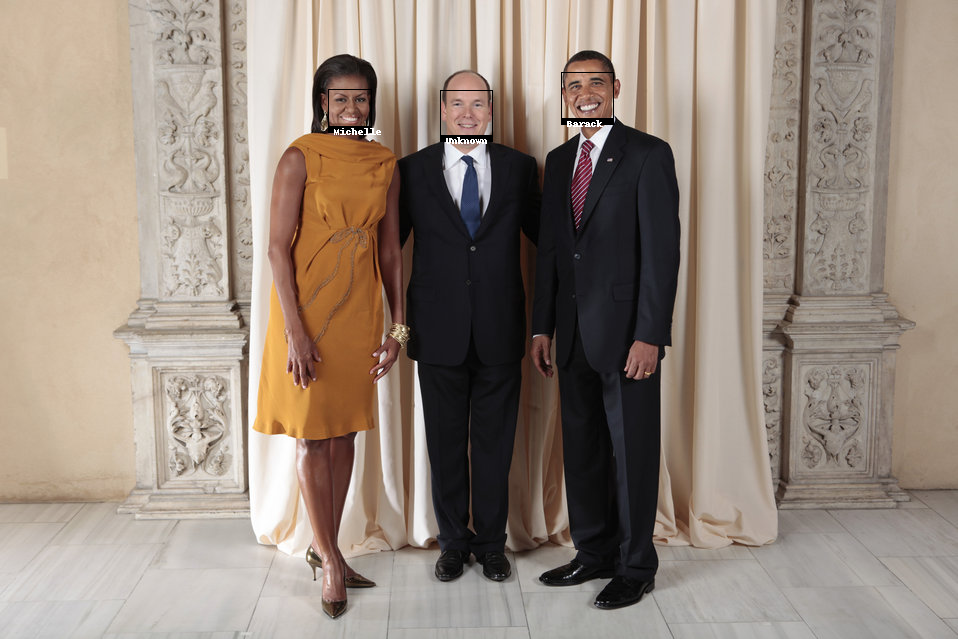

In [106]:
#Display Image
display(pil_image)
#pil_image.show()
#pil_image.save("recognised_faces.jpg")